In [22]:
from torchvision import transforms
import torch

import matplotlib.pyplot as plt
from PIL import Image
from torchvision.datasets import CIFAR10

from models.model_final import VisionTransformer, CONFIGS

In [ ]:
config = CONFIGS["ViT-Ours_Final"]

model = VisionTransformer(config, num_classes=10)
checkpoint_path = "/home/sichongjie/sichongjie-sub/ViT_torch/output_final/cifar10_No_3_checkpoint.bin" 
state_dict = torch.load(checkpoint_path, map_location="cpu")  # 加载权重文件
model.load_state_dict(state_dict)  # 加载模型参数
print(f"Loaded fine-tuned model from {checkpoint_path}")
model.eval()

Loaded fine-tuned model from /home/sichongjie/sichongjie-sub/ViT_torch/output_final/cifar10_No_3_checkpoint.bin


/tmp/ipykernel_1642376/2419150660.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(checkpoint_path, map_location="cpu")  # 加载权重文件


VisionTransformer(
  (transformer): Transformer(
    (embeddings): Embeddings(
      (hybrid_model): ResNet_2(
        (block0): Sequential(
          (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
          (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU()
        )
        (block1): Sequential(
          (0): Residual(
            (conv1): Conv2d(64, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
            (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(2, 2))
            (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
          (1): Residual(
            (conv1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (conv2): C

In [24]:
# 提取模型的位置信息嵌入
position_embeddings = model.transformer.embeddings.position_embeddings.data  # [N, D]
print(position_embeddings.shape)

torch.Size([1, 65, 384])


torch.Size([65, 384])
torch.Size([65, 384])


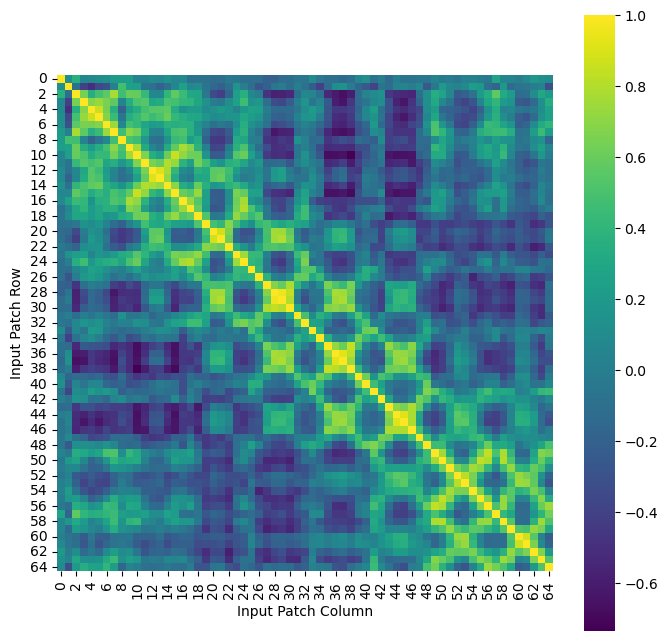

In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_position_embedding_similarity(position_embeddings):
    """
    可视化位置嵌入的余弦相似度。

    参数:
    - position_embeddings: 位置嵌入矩阵，形状为 (N, D)，其中 N 是位置数量，D 是嵌入维度。

    输出:
    - 热图显示位置嵌入之间的余弦相似度。
    """
    normed_embeddings = position_embeddings / position_embeddings.norm(dim=1, keepdim=True)  # [N, D]
    print(normed_embeddings.shape)
    similarity_matrix = torch.matmul(normed_embeddings, normed_embeddings.T)  # [N, N]

    plt.figure(figsize=(8, 8))
    sns.heatmap(similarity_matrix.cpu().numpy(), cmap="viridis", square=True, cbar=True)
    # plt.title("Position Embedding Cosine Similarity")
    plt.xlabel("Input Patch Column")
    plt.ylabel("Input Patch Row")
    plt.show()

print(position_embeddings.squeeze(0).shape)

visualize_position_embedding_similarity(position_embeddings.squeeze(0))
